<a href="https://colab.research.google.com/github/awarbler/CSE450AWF23/blob/main/M03PAHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Dictionary for the Housing dataset




id - Unique ID for each home sold<br>
date - Date of the home sale<br>
price - Price of each home sold<br>
bedrooms - Number of bedrooms<br>
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower<br>
sqft_living - Square footage of the apartments interior living space<br>
sqft_lot - Square footage of the land space<br>
floors - Number of floors<br>
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not<br>
view - An index from 0 to 4 of how good the view of the property was<br>
condition - An index from 1 to 5 on the condition of the apartment,<br>
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.<br>
sqft_above - The square footage of the interior housing space that is above ground level<br>
sqft_basement - The square footage of the interior housing space that is below ground level<br>
yr_built - The year the house was initially built<br>
yr_renovated - The year of the house’s last renovation<br>
zipcode - What zipcode area the house was listed in<br>
lat - Latitude<br>
long - Longitude<br>
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors<br>
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors<br>

#Goals

hat kind of machine-learning problem do you think we're looking at here?

Based on your initial analysis of the data, your team feels you can best show confidence in your model by using:

The sum of squares error (SSE).

The mean squared error (MSE).

The root mean squared error (RMSE).

The �2R2 value.



Whatever method we come up with to predict housing prices, will we attach some kind of empirical confidence metric?



Based on your initial analysis of the data, your team feels:

We can lower the predicted price for specific neighborhoods before training the model.

We can add average income or other demographic information for the area as features.

For specific zip codes we could add a step to our pipeline that reduces the predicted price by a specific percentage prior to outputting the final price result to ensure the properties aren’t being overvalued.

Taking this kind of action would be a violation of federal laws and/or ethics.



The head of data science says we should use gradient-boosted trees for this analysis. For example, how should we handle square footage?



Optional :  

Is there a way we can easily identify properties in low-income areas and have the model lower those estimates to protect our insurance customers' interests?

# Load libraries

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
import numpy as py
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import  train_test_split, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from typing_extensions import dataclass_transform
from scipy.stats import randint
from IPython.display import Image
from sklearn.datasets import load_wine
import seaborn as sns #for plotting graphs
import os
from xgboost import XGBRegressor

os.environ["COLUMNS"] = "74" # output width, in characters
pd.set_option("display.width", 74)

#Load Dataset

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

Prune Decision Tree


# Look at data

In [ ]:
dataset.head()
# date has issues
# bedrooms
# sqft_living
# sqft_above
# waterfront
# zip_code
# price

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1565930130,20141104T000000,4,3.25,3760,4675,2.0,0,0,3,...,2740,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0
1,3279000420,20150115T000000,3,1.75,1460,7800,1.0,0,0,2,...,1040,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0
2,194000575,20141014T000000,4,1.00,1340,5800,1.5,0,2,3,...,1340,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0
3,2115510160,20141208T000000,3,1.75,1440,8050,1.0,0,0,3,...,1440,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0
4,7522500005,20140815T000000,2,1.50,1780,4750,1.0,0,0,4,...,1080,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0


In [ ]:
dataset.info()
#no missing data 20000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20000 non-null  int64  
 1   date           20000 non-null  object 
 2   bedrooms       20000 non-null  int64  
 3   bathrooms      20000 non-null  float64
 4   sqft_living    20000 non-null  int64  
 5   sqft_lot       20000 non-null  int64  
 6   floors         20000 non-null  float64
 7   waterfront     20000 non-null  int64  
 8   view           20000 non-null  int64  
 9   condition      20000 non-null  int64  
 10  grade          20000 non-null  int64  
 11  sqft_above     20000 non-null  int64  
 12  sqft_basement  20000 non-null  int64  
 13  yr_built       20000 non-null  int64  
 14  yr_renovated   20000 non-null  int64  
 15  zipcode        20000 non-null  int64  
 16  lat            20000 non-null  float64
 17  long           20000 non-null  float64
 18  sqft_l

In [ ]:
#finding no of rows and columns
dataset.shape

(20000, 21)

In [ ]:
print(dataset.columns) # print columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')


In [ ]:
dataset.describe(include='all')
# uniques and Nan
# date has 370 unique

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.000000e+04,20000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.00000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,2.000000e+04
unique,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580297e+09,NaN,3.370200,2.115750,2079.883100,1.501533e+04,1.49645,0.007550,0.234900,3.409700,...,1790.232900,289.650200,1971.100150,82.732150,98077.876850,47.559970,-122.213897,1986.387500,12748.96040,5.394367e+05
std,2.875295e+09,NaN,0.931931,0.770134,919.433672,3.970135e+04,0.54095,0.086564,0.767692,0.651895,...,829.587101,441.537072,29.374008,397.872344,53.438026,0.138517,0.140649,685.211515,27076.48904,3.664334e+05
min,1.000102e+06,NaN,0.000000,0.000000,290.000000,5.200000e+02,1.00000,0.000000,0.000000,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.00000,7.500000e+04
25%,2.123049e+09,NaN,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,0.000000,0.000000,3.000000,...,1200.000000,0.000000,1951.750000,0.000000,98033.000000,47.470675,-122.328000,1490.000000,5100.00000,3.220000e+05
50%,3.904955e+09,NaN,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571450,-122.230000,1840.000000,7622.00000,4.500000e+05
75%,7.309825e+09,NaN,4.000000,2.500000,2550.000000,1.071000e+04,2.00000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678000,-122.124000,2360.000000,10088.25000,6.416250e+05


In [ ]:
# no duplicates
# no empty columns
# Nan


In [ ]:
dataset.nunique()
# look at dates

id               19846
date               370
bedrooms            13
bathrooms           30
sqft_living        995
sqft_lot          9297
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         908
sqft_basement      301
yr_built           116
yr_renovated        70
zipcode             70
lat               4973
long               742
sqft_living15      756
sqft_lot15        8310
price             3845
dtype: int64

In [ ]:
# Identify features
#Checking out the categories and their respective counts in each feature - running it through a for loop
for col in dataset.select_dtypes(include='object').columns:
    print(col, "column")
    print("Number of unique:", dataset[col].nunique())
    print(dataset[col].value_counts(), '\n')

date column
Number of unique: 370
20140623T000000    135
20140626T000000    123
20140625T000000    120
20140708T000000    117
20150427T000000    116
                  ... 
20140727T000000      1
20150527T000000      1
20150524T000000      1
20140830T000000      1
20141115T000000      1
Name: date, Length: 370, dtype: int64 



In [ ]:
# https://medium.com/shecodeafrica/predicting-house-prices-gradientboostingregressor-algorithm-ec9d381b0ebc
corr_matrix = dataset.corr()
top_correlated_features = corr_matrix.index
corr_matrix["price"].sort_values(ascending = False)

<ipython-input-43-d4b519259290>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


price            1.000000
sqft_living      0.703920
grade            0.666447
sqft_above       0.607082
sqft_living15    0.585374
bathrooms        0.527989
view             0.395961
sqft_basement    0.325183
lat              0.307516
bedrooms         0.307281
waterfront       0.260133
floors           0.254428
yr_renovated     0.121534
sqft_lot         0.090317
sqft_lot15       0.082413
yr_built         0.054187
condition        0.035146
long             0.023976
id              -0.016081
zipcode         -0.055857
Name: price, dtype: float64

In [ ]:
dataset['sqft_living'].value_counts()


1400    127
1300    126
1440    124
1660    122
1820    121
       ... 
9890      1
5170      1
5844      1
2906      1
380       1
Name: sqft_living, Length: 995, dtype: int64

In [ ]:
dataset['grade'].value_counts()

7     8329
8     5597
9     2427
6     1880
10    1055
11     366
5      218
12      84
4       28
13      12
3        3
1        1
Name: grade, dtype: int64

In [ ]:
dataset['sqft_above'].value_counts()

1300    194
1010    189
1200    186
1220    176
1340    167
       ... 
5040      1
1414      1
8860      1
4450      1
380       1
Name: sqft_above, Length: 908, dtype: int64

In [ ]:
dataset['bedrooms'].value_counts()


3     9101
4     6354
2     2567
5     1478
6      251
1      179
7       36
8       12
0       11
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [ ]:
# how to deal with outliers

In [ ]:
# Finding the count of waterfront.
dataset['waterfront'].value_counts()


0    19849
1      151
Name: waterfront, dtype: int64

In [ ]:
dataset['grade'].value_counts()


7     8329
8     5597
9     2427
6     1880
10    1055
11     366
5      218
12      84
4       28
13      12
3        3
1        1
Name: grade, dtype: int64

In [ ]:
dataset['condition'].value_counts()


3    12980
4     5247
5     1583
2      161
1       29
Name: condition, dtype: int64

<Axes: title={'center': 'house prices by sqft_above'}, xlabel='sqft_above', ylabel='price'>

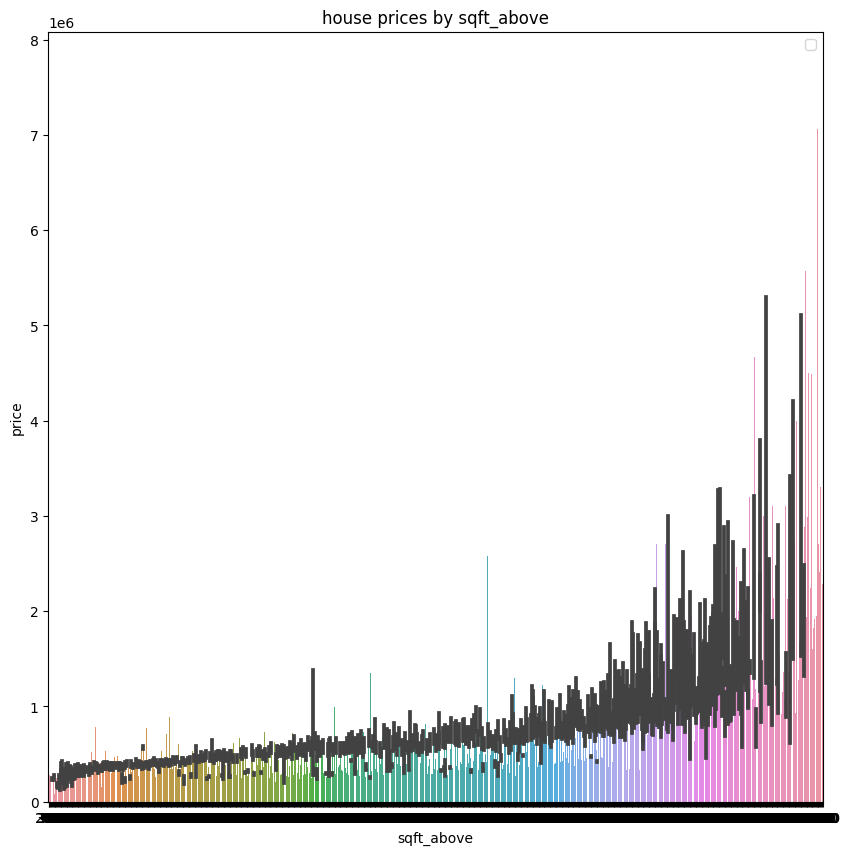

In [ ]:
import seaborn as sns
# A barplot is plotted between sqft living and prices to get an overview of how the price changes with sqft.
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
plt.title("house prices by sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('house prices')
plt.legend()
sns.barplot(x='sqft_above',y='price',data=dataset)

(array([2.470e+02, 2.390e+03, 4.357e+03, 4.289e+03, 3.366e+03, 2.237e+03,
        1.428e+03, 7.490e+02, 4.290e+02, 2.450e+02, 9.100e+01, 7.400e+01,
        3.700e+01, 2.000e+01, 1.200e+01, 9.000e+00, 8.000e+00, 5.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  290.        ,   731.66666667,  1173.33333333,  1615.        ,
         2056.66666667,  2498.33333333,  2940.        ,  3381.66666667,
         3823.33333333,  4265.        ,  4706.66666667,  5148.33333333,
         5590.        ,  6031.66666667,  6473.33333333,  6915.        ,
         7356.66666667,  7798.33333333,  8240.        ,  8681.66666667,
         9123.33333333,  9565.        , 10006.66666667, 10448.33333333,
        10890.        , 11331.66666667, 11773.33333333, 12215.        ,
        12656.66666667, 13098.33333333, 13540.        ]),
 <BarContainer object of 30 artists>)

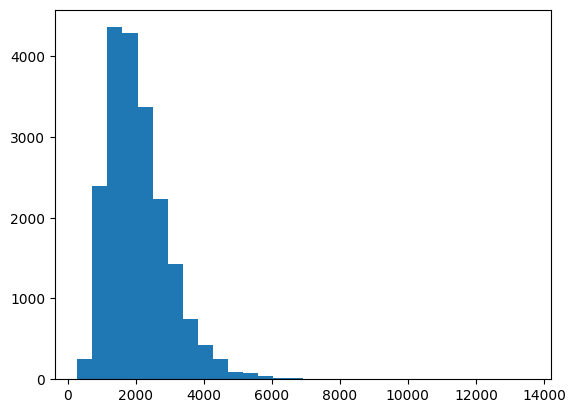

In [ ]:

# A histogram is plotted for sqft living.

plt.hist('sqft_living',data=dataset,bins=30)

<ipython-input-54-5c59edb88246>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['sqft_living'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)


<Axes: xlabel='sqft_living', ylabel='Density'>

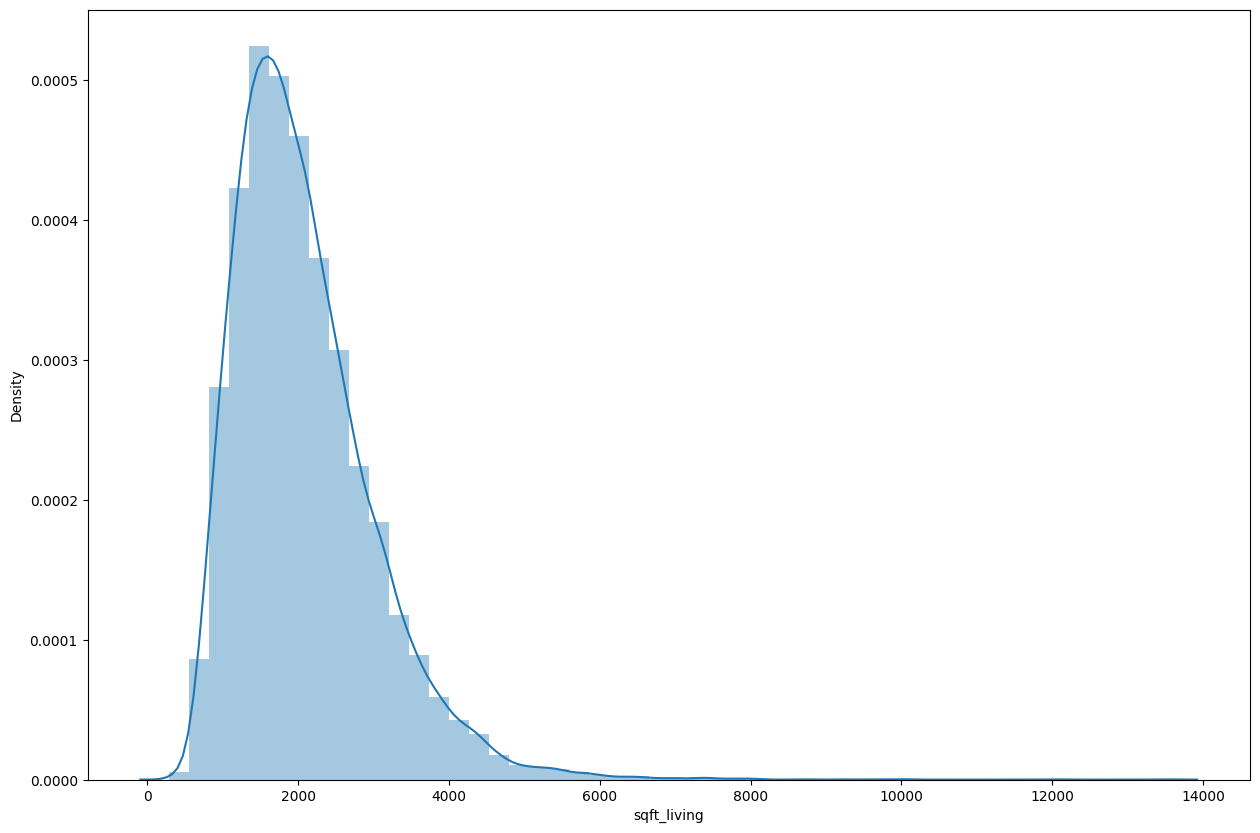

In [ ]:

#A distplot is plotted for sqft living to see if the data is skewed or not

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(dataset['sqft_living'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)

In [ ]:

#Finding the mean, mode and median of sqft living.

print('Mean',round(dataset['sqft_living'].mean(),2))
print('Median',dataset['sqft_living'].median())
print('Mode',dataset['sqft_living'].mode()[0])

Mean 2079.88
Median 1910.0
Mode 1400


In [ ]:

#Through graphs we observe that the sqft living=1300 has more values.

len(dataset[dataset['sqft_living']==1300])

126


Making sure we covered all the relations, we plot a correlation between all the features using a heatmap.

A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors.

<ipython-input-57-fec71a10b690>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True,cmap=colormap)


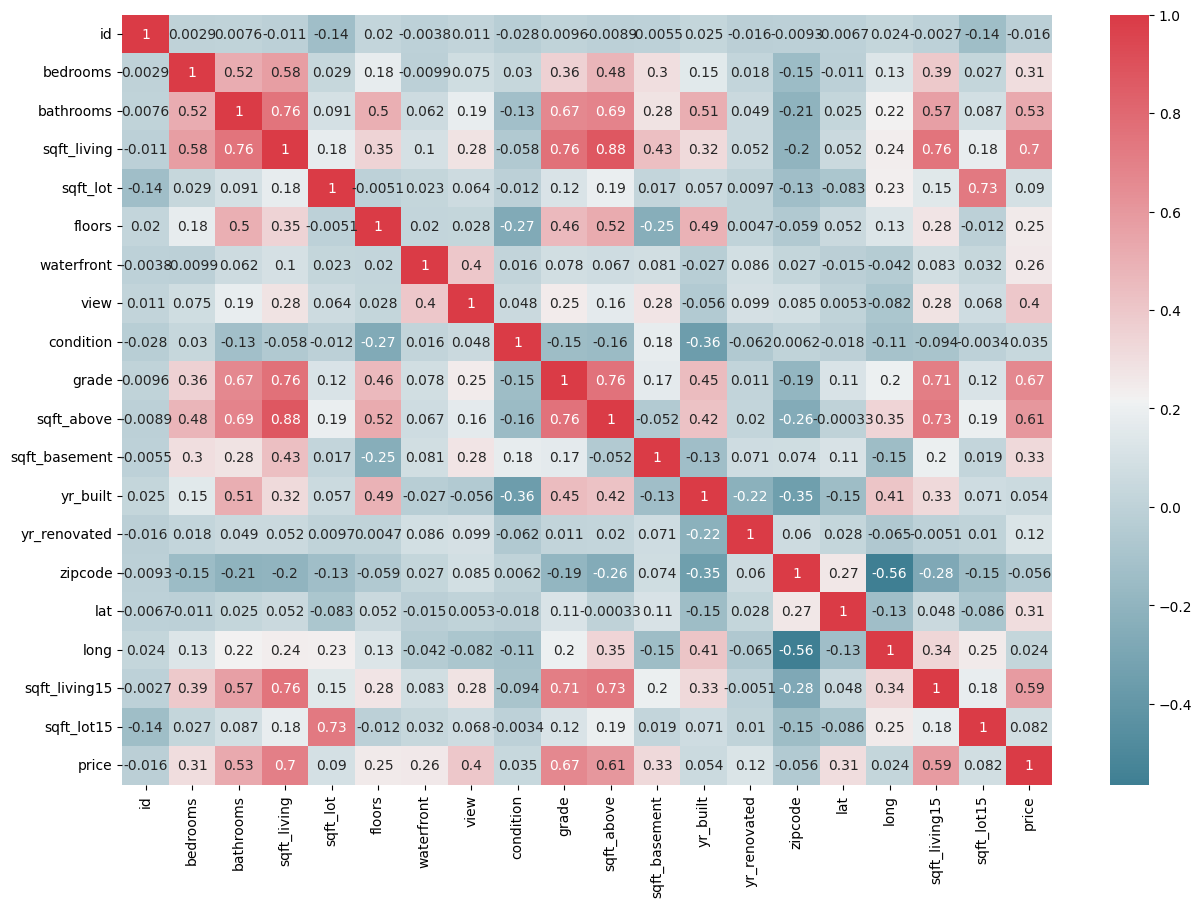

In [ ]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(dataset.corr(),annot=True,cmap=colormap)

correlation_heatmap(dataset)

### simple Linear Regression
https://towardsdatascience.com/regression-using-sklearn-on-kc-housing-dataset-1ac80ca3d6d4

PolynomialFeatures
PolynomialFeatures generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

The metrics is imported as the metric module implements functions assessing prediction error for specific purposes.

In KNeighborsRegressor the target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
train_data,test_data=train_test_split(dataset,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['sqft_living']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['sqft_living']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R sqaured testing',round(reg.score(x_test,y_test),3) )
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

NameError: ignored

# Gradient Boosting Regression


Next, we will split our dataset to use 90% for training and leave the rest for testing. We will also set the regression model parameters. You can play with these parameters to see how the results change.

n_estimators : the number of boosting stages that will be performed. Later, we will plot deviance against boosting iterations.

max_depth : limits the number of nodes in the tree. The best value depends on the interaction of the input variables.

min_samples_split : the minimum number of samples required to split an internal node.

learning_rate : how much the contribution of each tree will shrink.

loss : loss function to optimize. The least squares function is used in this case however, there are many other options (see GradientBoostingRegressor ).

https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py

## Divide the dataset into train and test sets using train_test_split module:

In [ ]:
df = load_wine() # cluster tasks
X = df.data
y = df.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=4#2
                                                    )

##Then, we create a GradientDescentClassifier() object and fit train data:

In [ ]:
clf_gbm = GradientBoostingClassifier()
clf_gbm.fit(X_train, y_train)

GradientBoostingClassifier()

##Then we predict the target values of test set using predict method and measure the accuracy of the model:

In [ ]:
y_pred = clf_gbm.predict(X_test)

In [ ]:
# accuracy Score
accuracy_score(y_test, y_pred)

0.9722222222222222

## Data preprocessing for Gradient Boosting Regression

## Fit regression model

Now we will initiate the gradient boosting regressors and fit it with our training data. Let’s also look and the mean squared error on the test data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}


In [ ]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0571


### Plot training deviance
Finally, we will visualize the results. To do that we will first compute the test set deviance and then plot it against boosting iterations.

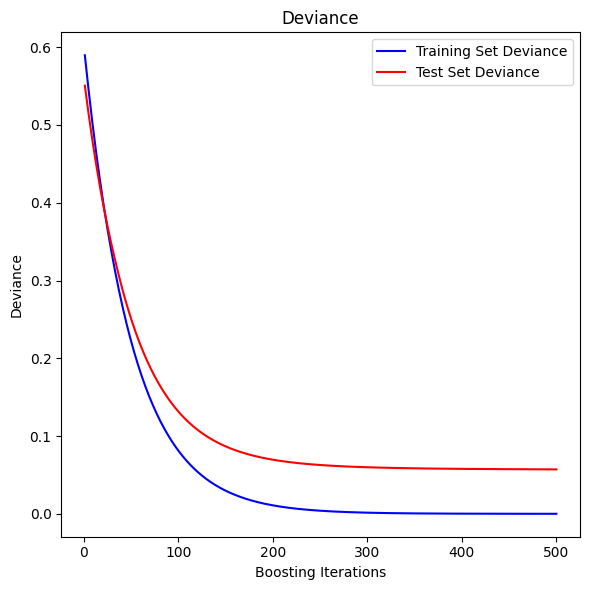

In [ ]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

### Plot feature importance

Warning Careful, impurity-based feature importances can be misleading for high cardinality features (many unique values). As an alternative, the permutation importances of reg can be computed on a held out test set. See Permutation feature importance for more details.


For this example, the impurity-based and permutation methods identify the same 2 strongly predictive features but not in the same order. The third most predictive feature, “bp”, is also the same for the 2 methods. The remaining features are less predictive and the error bars of the permutation plot show that they overlap with 0.

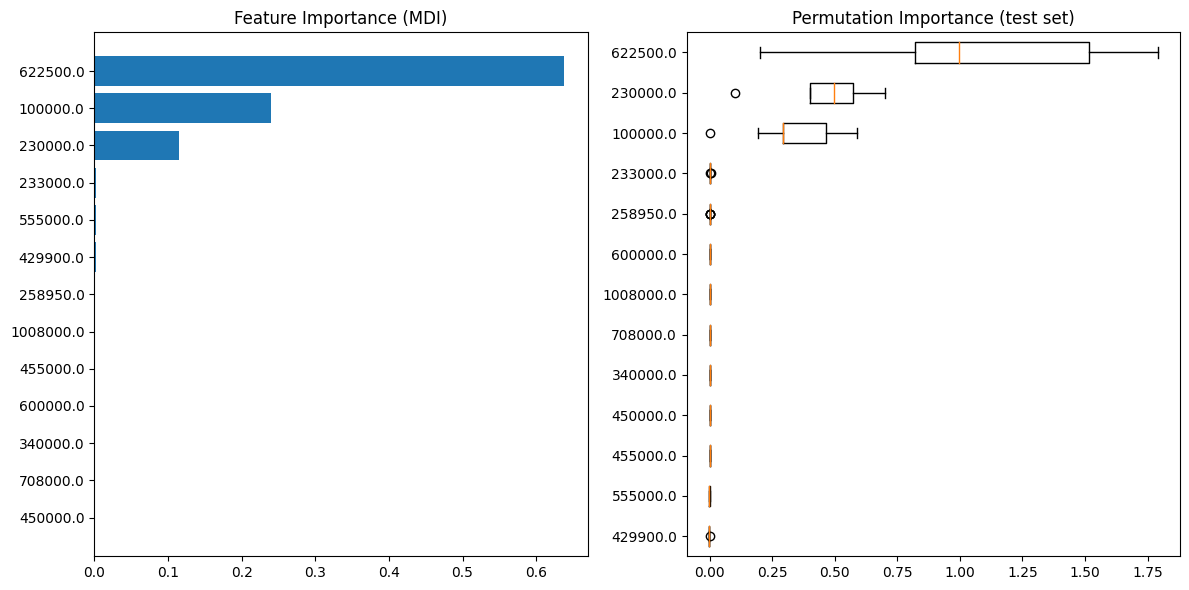

In [ ]:
###
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(dataset.price)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(dataset.price)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

Works Cited
https://towardsdatascience.com/regression-using-sklearn-on-kc-housing-dataset-1ac80ca3d6d4

https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regularization.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regularization-py

Brother Flores BYUI

https://towardsdatascience.com/decision-tree-and-random-forest-explained-8d20ddabc9dd



https://medium.com/swlh/using-machine-learning-to-predict-subscription-to-bank-term-deposits-for-clients-with-python-aec8a4690807

https://towardsdatascience.com/regression-using-sklearn-on-kc-housing-dataset-1ac80ca3d6d4

The below code was adapted from:
Emeka Efidi on 10/10/2022 https://medium.com/swlh/using-machine-learning-to-predict-subscription-to-bank-term-deposits-for-clients-with-python-aec8a4690807
 CODE

# R-squared testing: 0.496
A scatterplot graph is plotted for x_test, y_test. The data is spread over the graph. Now the line obtained from above is plotted to see how it fits for the data.

In [ ]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

Here we are splitting the data in 80:20 ratio, of which train_size is 80% and test_size is 20%. Here x is ‘grade’ and y is ‘price’. We are reshaping the x_train and y_train and the data is fitted. The x_test and y_test are used to predict the accuracy of the model. Here first we are calculating the squared mean error of y_test. The squared mean error for training and test are found. The intercept and coefficient of the line are found.

In [ ]:
train_data,test_data=train_test_split(dataset,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['grade']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['grade']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('squared mean error',round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R squared testing',round(reg.score(x_test,y_test),3))
print('intercept',reg.intercept_)
print('coeeficient',reg.coef_)

# Multiple Linear Regression


The boxplot is plotted for ‘grade’, ‘bedrooms’ and ‘bathrooms’ with respective to ‘price’.

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(10,10))
sns.boxplot(x=train_data['grade'],y=train_data['price'],ax=ax[0])
sns.boxplot(x=train_data['bedrooms'],y=train_data['price'],ax=ax[1])
_ , axes = plt.subplots(1, 1, figsize=(10,10))
sns.boxplot(x=train_data['bathrooms'],y=train_data['price'])

The features we are considering are ‘bedrooms’, ‘grade’, ‘sqft_living’ and ‘sqft_above’. These are considered are one feature namely features1. Now the data is fitted into the model and test_data of features1 are used for prediction. Mean squared error is calculated for y_test. The mean squared error is rounded of upto 2 decimals. R squared error for both training and test is calculated. The intercept of the line is calculated along with coefficient of individual feature.

In [ ]:
features1=['bedrooms','grade','sqft_living','sqft_above']
reg=linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred=reg.predict(test_data[features1])
print('complex_model 1')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('mean squared error(MSE)', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(train_data[features1],train_data['price']),3))
print('R squared training', round(reg.score(test_data[features1],test_data['price']),3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

R-squared testing: 0.555

The features we are considering are ‘bedrooms’, ’bathrooms’, ’sqft_living’, ’sqft_lot’, ’floors’, ’waterfront’, ’view’, ’grade’, ’sqft_above’, ’sqft_basement’, ’lat’,’sqft_living15'. These are considered are one feature namely features2. Now the data is fitted into the model and test_data of features2 are used for prediction. Mean squared error is calculated for y_test. The mean squared error is rounded of upto 2 decimals. R squared error for both training and test is calculated. The intercept of the line is calculated along with coefficient of individual feature.

In [ ]:
features2 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']
reg= linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred = reg.predict(test_data[features1])
print('Complex Model_2')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(train_data[features1], train_data['price']), 3))
print('R-squared (testing) ', round(reg.score(test_data[features1], test_data['price']), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

# Polynomial Regression


Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x).

For degree=2, the linear modelis built. The mean squared error is calculated and r squared is found for training and testing.

In [ ]:
polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('Complex Model_3')
mean_squared_error = metrics.mean_squared_error(test_data['price'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

Complex Model_3
Mean Squared Error (MSE)  266493.56
R-squared (training)  0.62
R-squared (testing)  0.496



R-squared testing: 0.759


For degree=3, the linear model is built. The mean squared error is calculated and r squared is found for training and testing.

In [ ]:
polyfeat=PolynomialFeatures(degree=3)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('complex model_4')
mean_squared_error=metrics.mean_squared_error(test_data['price'],polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

complex model_4
Mean Squared Error (MSE)  321287.72
R-squared (training)  0.631
R-squared (testing)  0.268


R-squared testing: 0.664

Observation
Complex Model_3 gives us R-squared (testing) score of 0.759. From above reports, we can conclude that Polynomial regression for degree=2, is best solution.

For notebook, refer here. I would be pleased to receive feedback or questions on any of the above.

end: https://towardsdatascience.com/regression-using-sklearn-on-kc-housing-dataset-1ac80ca3d6d4

https://medium.com/shecodeafrica/predicting-house-prices-gradientboostingregressor-algorithm-ec9d381b0ebc

In [ ]:
# Identify features
#Checking out the categories and their respective counts in each feature - running it through a for loop
for col in dataset.select_dtypes(include='object').columns:
    print(col, "column")
    print("Number of unique:", dataset[col].nunique())
    print(dataset[col].value_counts(), '\n')

date column
Number of unique: 370
20140623T000000    135
20140626T000000    123
20140625T000000    120
20140708T000000    117
20150427T000000    116
                  ... 
20140727T000000      1
20150527T000000      1
20150524T000000      1
20140830T000000      1
20141115T000000      1
Name: date, Length: 370, dtype: int64 



In [ ]:
# look at dates it is an object we need to change it before we can use it in gradient.
# what should we do
#normalized?


In [ ]:
# just dropping to get examples to work
dataset.drop(columns=['date'])


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1565930130,4,3.25,3760,4675,2.0,0,0,3,8,2740,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0
1,3279000420,3,1.75,1460,7800,1.0,0,0,2,7,1040,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0
2,194000575,4,1.00,1340,5800,1.5,0,2,3,7,1340,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0
3,2115510160,3,1.75,1440,8050,1.0,0,0,3,8,1440,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0
4,7522500005,2,1.50,1780,4750,1.0,0,0,4,7,1080,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5272200045,3,1.50,1000,6914,1.0,0,0,3,7,1000,0,1947,0,98125,47.7144,-122.319,1000,6947,378000.0
19996,9578500790,3,2.50,3087,5002,2.0,0,0,3,8,3087,0,2014,0,98023,47.2974,-122.349,2927,5183,399950.0
19997,7202350480,3,2.50,2120,4780,2.0,0,0,3,7,2120,0,2004,0,98053,47.6810,-122.032,1690,2650,575000.0
19998,1723049033,1,0.75,380,15000,1.0,0,0,3,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000,245000.0


#Examples


## set x and y

In [ ]:
#set X and Y
df = load_wine() # cluster tasks
X = df.data
y = df.target

## Binning

This will replace the price column witht he bin indices. The labels=False argument means we want the bin indices instead of the bin ranges. If you want the bin ranges, you can remove this arguement.
- Binning is useful for continuous variables with a large range of values.
- It can handle outliers and turn continuous variables into categorical ones.
- Variables like 'median_income' and 'housing_median_age' in the housing dataset could benefit from binning.
- Understanding the distribution of variables and the impact of binning on model performance is important.


In [ ]:
dataset['price_bin'] = pd.cut(dataset['price'],bins=3, labels=False)

## Training the testing sets


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Gradient Boost Model


In [ ]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Linear Regresssion


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

#Mean Squared Error (MSE)  and R^2
calculate





In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

In [ ]:
X = dataset.drop('target', axis=1)
y = dataset['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Then, create and train a Linear Regression model:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
#Now we can make predictions on the test set and calculate MSE, RMSE, and R²:
# Make predictions

y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

## Empirical Confidence metric


# simple Linear Regression
https://towardsdatascience.com/regression-using-sklearn-on-kc-housing-dataset-1ac80ca3d6d4

PolynomialFeatures
PolynomialFeatures generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

The metrics is imported as the metric module implements functions assessing prediction error for specific purposes.

In KNeighborsRegressor the target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
train_data,test_data=train_test_split(dataset,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['sqft_living']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['sqft_living']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R sqaured testing',round(reg.score(x_test,y_test),3) )
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

linear model
Sqaured mean error 267252.17
R squared training 0.496
R sqaured testing 0.493
intercept [-43061.10259975]
coefficient [[280.23562584]]
